<a href="https://colab.research.google.com/github/FongwanSeverin/Course-5/blob/main/Copy_of_Data_Staging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Identification

Nom : Shivan Pillay <br/>


# Analyse Exploratoire

## Importer les bibliothèques importantes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
# Votre code ici

## Lire un de données
Il doit être possible pour les correcteurs d'exécuter votre notebook sans nécessiter de téléchargements.

Pour faciliter l'accès à l'ensemble de données sans nécessiter de téléchargements, utilisez les données fournies dans le dépôt public GitHub et fournissez un lien vers la version brute de l'ensemble de données.

Le lien vers la version brute est le suivant :

*https://raw.githubusercontent.com/NOM_UTILISATEUR_GITHUB/NOM_DÉPÔT/main/NOM_JEU_DONNÉES.csv*

Par exemple :

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv](https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Maintenant, fournissez le lien vers VOTRE ensemble de données et lisez-le :


In [ ]:
# fournissez le lien vers la version brute de l'ensemble de données. Vous devez fournir un lien vers votre propre dépôt GitHub. NE PAS utiliser le lien fourni en exemple.

url = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/01/glass.csv'
dataset = pd.read_csv(url)
url1='https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/02/dermatology_database_1.csv'
dataset1 = pd.read_csv(url1)
url2='https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv'
dataset2 = pd.read_csv(url2)
url3='https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/04/car.data'
dataset3 = pd.read_csv(url3)
url4='https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/04/car.data'
dataset4 = pd.read_csv(url4)
url5 = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/06/16P.csv"

dataset5 = pd.read_csv(url5, encoding='latin1')
url6='https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/07/train.csv'
dataset6 = pd.read_csv(url6)
url7='https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/07/test.csv'
dataset7 = pd.read_csv(url7)

/tmp/ipython-input-589332292.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset6 = pd.read_csv(url6)


## Directives

Les questions suivantes sont pour le Devoir 1. Sous chaque question, nous avons fourni une cellule de code initiale. Vous êtes encouragés à ajouter des cellules de code supplémentaires pour maintenir une séparation logique de votre code. Par exemple, placez la définition d'une fonction dans une cellule et son exécution dans une cellule suivante. Cette approche aidera à préserver la clarté et à améliorer la lisibilité en évitant de placer trop de code dans une seule cellule.

1. **Analyse des valeurs manquantes** : Examinez les jeux de données pour identifier et évaluer les valeurs manquantes dans divers attributs. Les valeurs manquantes peuvent être représentées par des symboles tels que '?', des chaînes vides ou d'autres substituts.

    1.1 Parmi les options listées, quels sont les jeux de données qui contiennent des valeurs manquantes ? Plus précisément, quel attribut ou quels attributs ont des valeurs manquantes ?

    1.2 Décrivez la méthodologie utilisée pour cette investigation, et fournissez le code correspondant.

    1.3 L'imputation des données consiste à remplacer les données manquantes ou incomplètes par des valeurs substituées pour préserver l'intégrité de l'ensemble de données en vue d'analyses ultérieures. Proposez des stratégies d'imputation pour chaque attribut avec des valeurs manquantes.


In [ ]:
#  placeholders that represent missing values
special_missing_values = ['?', '-', '3_', '_']

# List of datasets
datasets = [dataset, dataset1, dataset2, dataset3, dataset4, dataset5, dataset6, dataset7]

# Loop through each dataset
for i, dataset in enumerate(datasets):
    # Replace  with nan in each dataset
    dataset.replace(special_missing_values, np.nan, inplace=True)
    # a negative number is considered that the  payment was made early for dataset 6 and 7 for Delay_from_due_date attribute
    # Additional check for negative values in 'Num_of_Delayed_Payment'
    if 'Num_of_Delayed_Payment' in dataset.columns:
        dataset['Num_of_Delayed_Payment'] = pd.to_numeric(dataset['Num_of_Delayed_Payment'], errors='coerce')
        dataset['Num_of_Delayed_Payment'] = dataset['Num_of_Delayed_Payment'].apply(lambda x: np.nan if x < 0 else x)

    # Check for missing values
    missing_values = dataset.isnull().sum()

    # Pprint in correct order
    if i == 0:
        print("Missing values in dataset0:")
    else:
        print(f"Missing values in dataset{i}:")

    print(missing_values)
    print("-" * 40)



# Votre code ici

Missing values in dataset0:
Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64
----------------------------------------
Missing values in dataset1:
erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis               

### I loaded the dataset into a Pandas DataFrame and used the isnull() function to check for missing values. By applying the .sum() function, I calculated the number of missing values for each column.

### 1.1 The Dermatology dataset along with the 6th and 7th dataset, train.csv and test.csv, has missing values, where the missing value's arrribute are:  the following attributes:

#### **dermatology_database.csv**
#### Age: 8 missing values
#### **train.csv**
#### Name: 9985 missing values
#### Monthly_Inhand_Salary: 15,002 missing value
#### Num_of_Loan: 718 missing values
#### Type_of_Loan: 11,408 missing values
#### Num_of_Delayed_Payment: 10368 missing values
#### hanged_Credit_Limit : 2091 missing values
#### Credit_Mix: 20195  missing values
#### Num_Credit_Inquiries: 1965 missing values
#### Credit_History_Age: 9030 missing values
#### Amount_invested_monthly: 4479 missing values
#### Monthly_Balance: 1200 missing values
#### **test.csv**
#### Name: 5015 missing values
#### Monthly_Inhand_Salary: 7498 missing values
#### Num_of_Loan: 400 missing values
#### Type_of_Loan: 5704 missing values
#### Num_of_Delayed_Payment: 5200 missing values
#### Changed_Credit_Limit: 1059 missing values
#### Num_Credit_Inquiries: 1035 missing values
#### Credit_History_Age: 4470 missing values
#### Credit_Mix: 9805 missing values
#### Amount_invested_monthly: 2271 missing values
#### Monthly_Balance: 562 missing values
### 1.2
#### A list of the datasets is created. Several placeholder symbols such as "?", "-", "3_", and "_", which were used to represent missing or invalid data values across the datasets.The isnull().sum() function to check for missing values (blank or NaN values) in each column of all datasets. isnull() function in Pandas to identify missing values in each dataset, followed by the sum() function to count the number of missing values in each column. Since some missing values were represented by placeholders like "?", "-", "3_", and "_", the replace() function is used to convert these placeholders into nan before rechecking for missing values. A negative number is considered that the  payment was made early for dataset 6 and 7 for Delay_from_due_date attribute. An  additional check is done for negative values in 'Num_of_Delayed_Payment'. This approach allowed me to identify which columns have missing values and count how many values are missing. Using a loop, each dataset is processed and is checked for missing values  After replacing the placeholders, the isnull() function is used to detect missing values, and sum() was used to count the missing values in each column
### 1.3
#### For name attribute,  a placeholder like "Unknown" for the missing values can be used.
#### For the dermatolofy dataset for age, the missing values can be imputed using the mean or median of the age column, dataset train.csv and test.csv,For Monthly_Inhand_Salary,Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly, Monthly_Balance, as it is numerical, missing values can ve replaced using mean or median of the respective column.
#### As Type_of_Loan is a categorical attribute, missing values can be replaced by the mode of the column.



```
# This is formatted as code
```

I chose the dermatology csv dataset and imputed the missing age values of the attribute using the median method

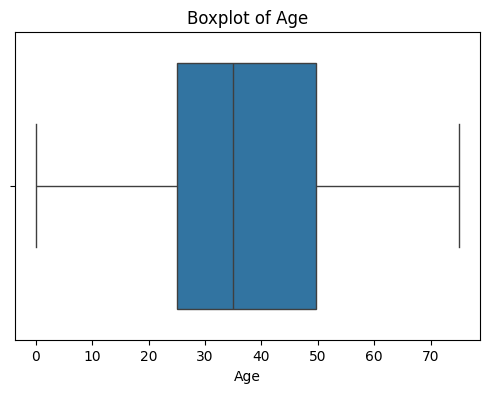

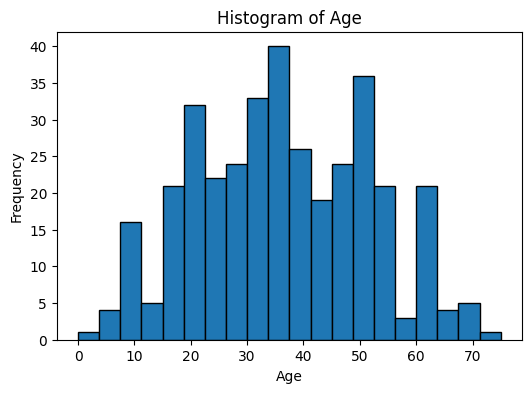

In [ ]:
# Ensure 'age' is numeric (convert strings to NaN if necessary)
dataset1['age'] = pd.to_numeric(dataset1['age'], errors='coerce')

# Drop any rows that are still NaN just for plotting (optional)
dataset1 = dataset1.dropna(subset=['age'])

# Boxplot for 'age'
plt.figure(figsize=(6, 4))
sns.boxplot(x=dataset1['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

# Histogram for 'age'
plt.figure(figsize=(6, 4))
plt.hist(dataset1['age'], bins=20, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Impute the missing 'age' values using the median
median_age = dataset1['age'].median()
dataset1['age'].fillna(median_age, inplace=True)

# Verify that there are no more missing values in the age column
print(dataset1['age'].isnull().sum())


0


2. **Sélectionnez et familiarisez-vous avec une tâche de classification :** Choisissez l'un des jeux de données fournis pour une exploration plus approfondie. Il est conseillé de sélectionner un jeu de données contenant un nombre suffisamment important d'exemples, idéalement environ 1 000, pour garantir des résultats robustes lors de l'application des algorithmes d'apprentissage automatique dans le devoir suivant.

    2.1 Quel est l'objectif de la tâche ? Est-elle destinée à une application spécifique ? Possédez-vous une expertise dans ce domaine d'application particulier ?


# The choice of dataset is the Maternal Health Risk
### As it has around 1000 entries, it will have enough entries for a classification task. We can predict Risk Level as a classification task of a patient based on their health metrics such as Age, SystolicBP, DiastolicBP, Blood Sugar (BS), Body Temperature, and Heart Rate which can a be helpful and useful application in the medical sector to assist doctors and medical consultants. I am experienced in chemistry and medical physics.

3. **Analyse des attributs** :

    3.1 Déterminez quels attributs manquent d'informativité et devraient être exclus pour améliorer l'efficacité de l'analyse d'apprentissage automatique. Si toutes les caractéristiques sont jugées pertinentes, indiquez explicitement cette conclusion.

    3.2 Examinez la distribution de chaque attribut (colonne) au sein de l'ensemble de données. Utilisez des histogrammes ou des boxplots pour visualiser les distributions, en identifiant les motifs sous-jacents ou les valeurs aberrantes.


In [ ]:
for column in dataset2.columns:
    if dataset2[column].nunique() == 1:
        print(f"{column} is uninformative")
# Select only numeric columns for correlation
numeric_columns = dataset2.select_dtypes(include=[float, int])

# print correlation matrix
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)


                  Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
Age          1.000000    0.416045     0.398026  0.473284 -0.255323   0.079798
SystolicBP   0.416045    1.000000     0.787006  0.425172 -0.286616  -0.023108
DiastolicBP  0.398026    0.787006     1.000000  0.423824 -0.257538  -0.046151
BS           0.473284    0.425172     0.423824  1.000000 -0.103493   0.142867
BodyTemp    -0.255323   -0.286616    -0.257538 -0.103493  1.000000   0.098771
HeartRate    0.079798   -0.023108    -0.046151  0.142867  0.098771   1.000000


dataset2.columns loops through every column in your DataFrame.

dataset2[column].nunique() returns the number of unique values in that column.

If that number equals 1, the column contains only one unique value (e.g., all rows have “Yes” or all have 0).

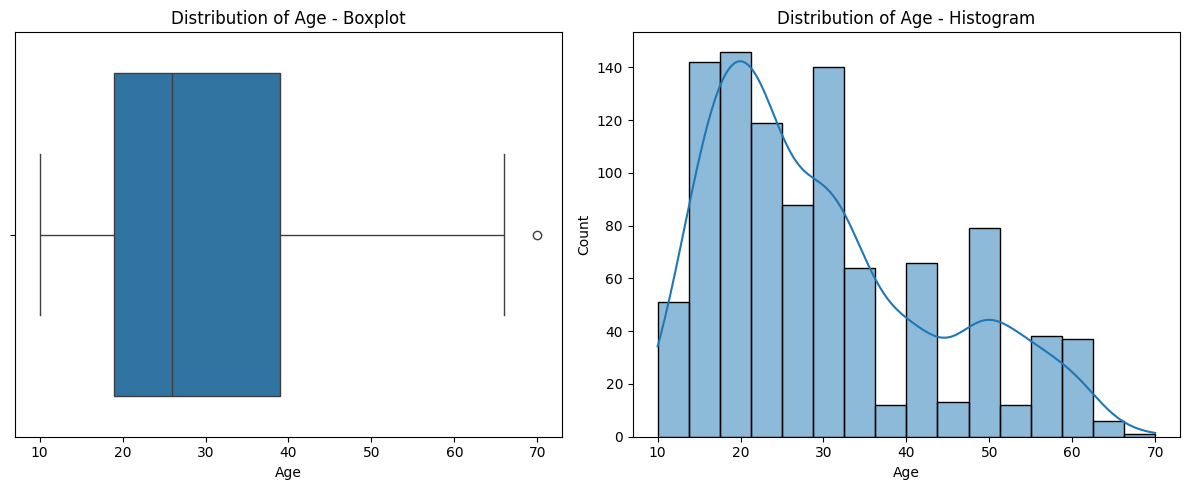

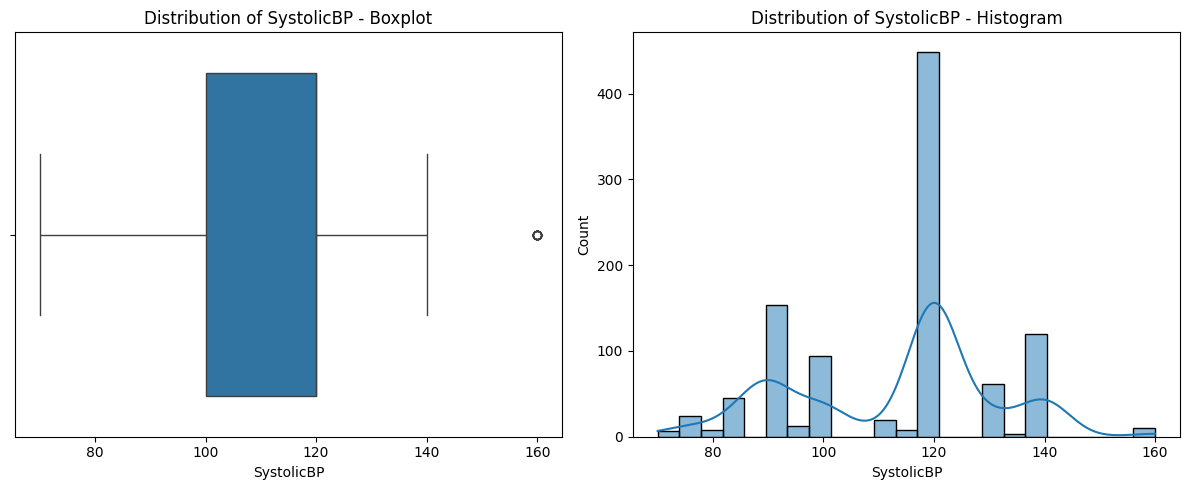

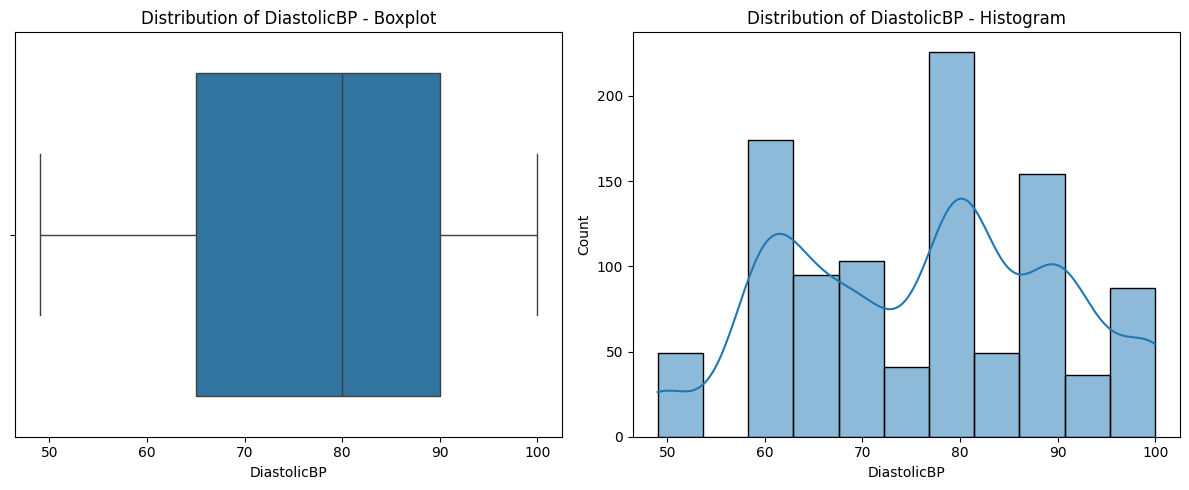

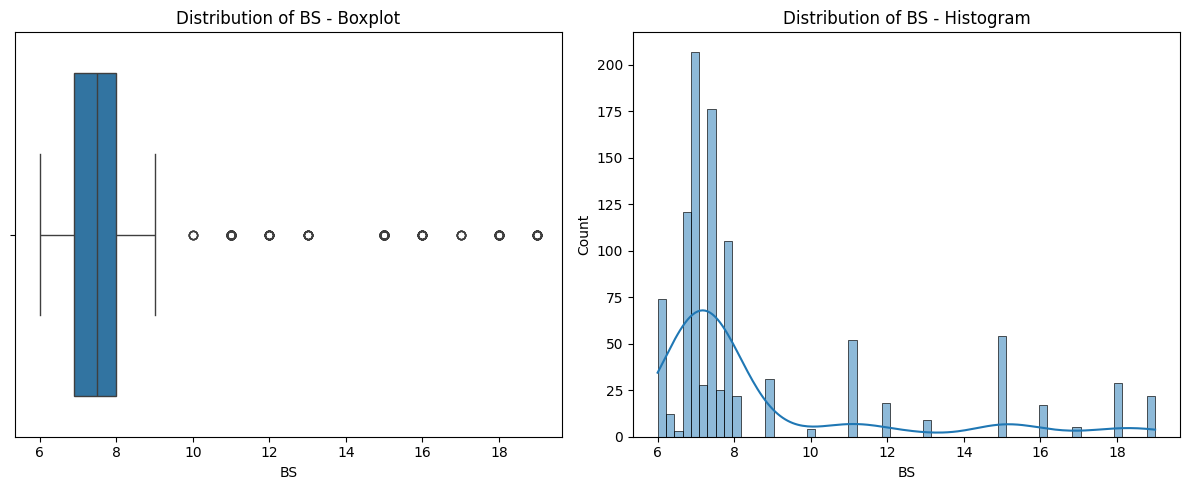

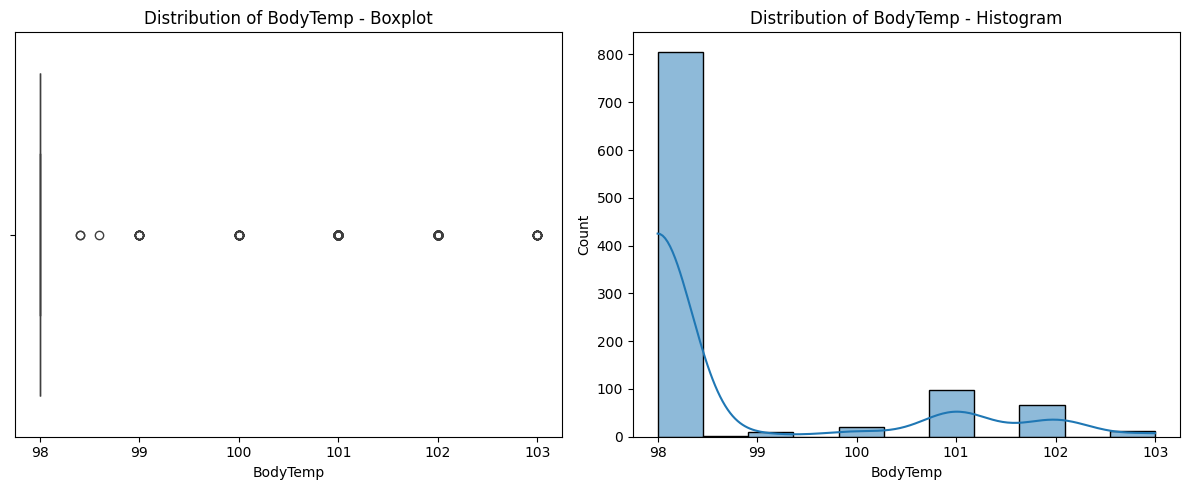

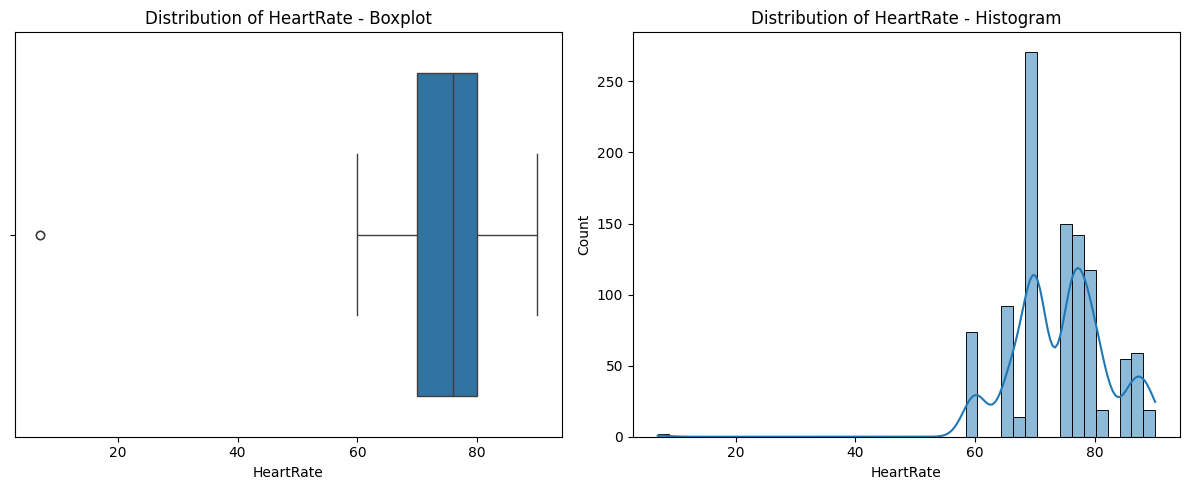

In [ ]:

numeric_columns = dataset2.select_dtypes(include=[float, int])

for column in numeric_columns.columns:
    # Plotting both boxplot and histogram for each numeric column
    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=numeric_columns[column])
    plt.title(f'Distribution of {column} - Boxplot')

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(numeric_columns[column], kde=True)
    plt.title(f'Distribution of {column} - Histogram')

    plt.tight_layout()  # To prevent overlapping
    plt.show()

### 3.1 None of the columns are marked as uninformative (that is having only a single unique value). Therefore, all attributes seem to contribute some variation to the dataset, which is good for the learning algorithms.
### Corelation was also determined for numerical attributes. SystolicBP and DiastolicBP are highly correlated (0.787), which makes sense as they both measure blood pressure.Blood Sugar (BS) has moderate correlations with other features like SystolicBP (0.425) and DiastolicBP (0.423). High correlation between two features can lead to multicollinearity which can affect some models,Systolic BPcan be excluded.

Multicolinearity example:
Let’s say you’re predicting house prices:

Predictor 1: Square footage

Predictor 2: Number of rooms

These two are naturally correlated (bigger houses → more rooms).
Including both can cause multicollinearity, making the model unsure how to distribute weight between them. That means they carry overlapping information, they’re not giving the model new or unique insight.

### 3.2 BS (Blood Sugar): There are numerous outliers on the higher end. SystolicBP: There's an outlier on the higher side. BodyTemp has outlier on both sides as seen from the above diagrams.


4. **Analyse de la distribution des classes** : Examinez la distribution des étiquettes de classe au sein jeu de données. Utilisez des diagrammes en barres pour visualiser la fréquence des instances pour chaque classe et évaluez si l'ensemble de données est équilibré ou déséquilibré.


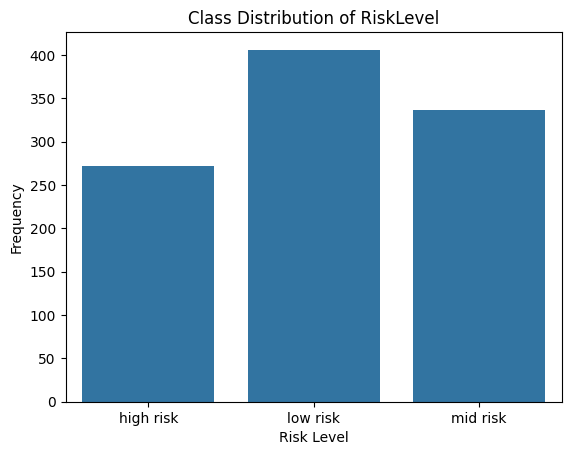

In [ ]:
# risk level is the target
sns.countplot(x='RiskLevel', data=dataset2)
plt.title('Class Distribution of RiskLevel')
plt.xlabel('Risk Level')
plt.ylabel('Frequency')
plt.show()
# Votre code ici

### The dataset is slightly imbalanced, as the number of instances in each class is not equal with low risk being the most frequent and high risk with the least frequent.

5. **Prétraitement** :

    5.1 Pour les attributs numériques, déterminez la meilleure transformation à utiliser. Indiquez la transformation qui semble appropriée et pourquoi. Incluez le code illustrant comment appliquer la transformation. Pour au moins un attribut, montrez la distribution avant et après la transformation. Voir [Prétraitement des données](https://scikit-learn.org/stable/modules/preprocessing.html).

    5.2 Pour les attributs catégoriels, montrez comment appliquer [l'encodage one-hot](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Si votre ensemble de données ne contient pas de données catégorielles, montrez comment appliquer l'encodeur one-hot à l'étiquette (variable cible).


### 5.1 For numerical attributes Z-score normalisation is used so that the data will have a mean of 1 and standard deviation of 0. In the dataset, attributes like SystolicBP and BodyTemp are measured on different scales. Standardization rescales these values to have a mean of 0 and a standard deviation of 1. By centering the data, it allows certain algorithms (like SVMs) to handle outliers more effectively.


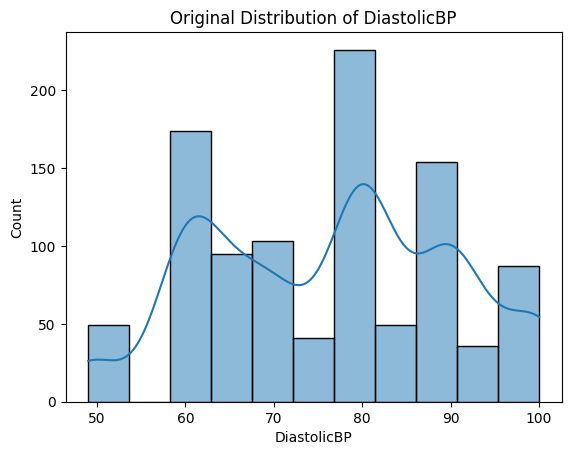

In [ ]:
#preview of SystolicBP before standarlisation
sns.histplot(dataset2['DiastolicBP'], kde=True)
plt.title('Original Distribution of DiastolicBP')
plt.show()

In [ ]:

numeric_columns = ['Age', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the selected columns and create a newdf with scaled data
dataset2_scaled = dataset2.copy()
dataset2_scaled[numeric_columns] = scaler.fit_transform(dataset2[numeric_columns])


print(dataset2_scaled.head())
# Votre code ici

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  RiskLevel
0 -0.361738         130     0.255023  1.905890 -0.485215   1.446956  high risk
1  0.380777         140     0.975539  1.298340 -0.485215  -0.532088  high risk
2 -0.064732          90    -0.465493 -0.220537  0.973884   0.704815  high risk
3  0.009519         140     0.615281 -0.524312 -0.485215  -0.532088  high risk
4  0.380777         120    -1.186009 -0.797710 -0.485215   0.210054   low risk


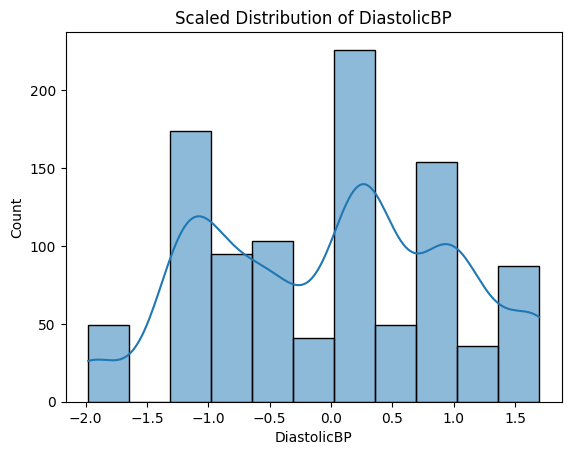

In [ ]:
#preview of SystolicBP after standarlisation
sns.histplot(dataset2_scaled['DiastolicBP'], kde=True)
plt.title('Scaled Distribution of DiastolicBP')
plt.show()

In [ ]:
# Creating the OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(dataset2_scaled[['RiskLevel']])

# Convert to a seperate df
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['RiskLevel']))

# Concatenate the original dataset with the encoded columns
dataset2_encoded = pd.concat([dataset2_scaled, encoded_df], axis=1)

# Drop the original categorical column
dataset2_encoded.drop('RiskLevel', axis=1, inplace=True)


print(dataset2_encoded.head())

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
0 -0.361738         130     0.255023  1.905890 -0.485215   1.446956   
1  0.380777         140     0.975539  1.298340 -0.485215  -0.532088   
2 -0.064732          90    -0.465493 -0.220537  0.973884   0.704815   
3  0.009519         140     0.615281 -0.524312 -0.485215  -0.532088   
4  0.380777         120    -1.186009 -0.797710 -0.485215   0.210054   

   RiskLevel_high risk  RiskLevel_low risk  RiskLevel_mid risk  
0                  1.0                 0.0                 0.0  
1                  1.0                 0.0                 0.0  
2                  1.0                 0.0                 0.0  
3                  1.0                 0.0                 0.0  
4                  0.0                 1.0                 0.0  


### The target variable, a categorical attribute in this case is RiskLevel. TheOneHotEncoder() from the sklearn.preprocessing library to convert the RiskLevel column into binary columns for each category (high risk, low risk, and mid risk). The encoded_data is then converted into a dataframe. The one-hot encoded columns are concatenated back to the original dataframe. The original RiskLevel column is removed. RiskLevel is a nominal variable therefore pne-hot encoding is appropriate because it doesn’t impose any ordinal relationship between these categories.

### One-hot encoding is used to convert categorical attributes into numerical form by creating multiple binary columns for each category of risk level that is high risk, mid risk and low risk.

--------------------------------------------------------------------------

# Références

Assurez-vous de fournir des références à TOUTES les sources utilisées (articles, code, algorithmes).

## Transcription AI
https://chatgpt.com/share/66f8a6bb-b450-8000-99fe-c0198cd8af2d
**Indice :** Pour partager un lien vers votre notebook Colab, cliquez sur "share" en haut à droite. Ensuite, sous *Accès général*, changez *Restreint* en "Toute personne avec le lien".

### References: Otoum, Y. (2024). Fundamentals of Data Science [Lecture notes]. CSI 4142:  Fundamentals of Data Science, University of Ottawa, Ottawa.
